##### Import the required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter

## 1. Import the test and train dataset

In [2]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

#familiarize with the dataset
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#size of the dataset
train.shape, test.shape

((891, 12), (418, 11))

In [4]:
#shows 10 random rows
train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
56,57,1,2,"Rugg, Miss. Emily",female,21.0,0,0,C.A. 31026,10.5000,NaN,S
598,599,0,3,"Boulos, Mr. Hanna",male,NaN,0,0,2664,7.2250,NaN,C
108,109,0,3,"Rekic, Mr. Tido",male,38.0,0,0,349249,7.8958,NaN,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN
40,41,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.0,1,0,7546,9.4750,NaN,S
837,838,0,3,"Sirota, Mr. Maurice",male,NaN,0,0,392092,8.0500,NaN,S
327,328,1,2,"Ball, Mrs. (Ada E Hall)",female,36.0,0,0,28551,13.0000,D,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S


In [5]:
#descriptive statistics
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Observations** from above:
**Age** has 177 missing values

In [6]:
#datatypes of each features
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

* Survived, Pclass, Parch, Fare - Int
* Age, Fare - Float
* Name, Sex, Ticket, Cabin, Embarked - String           

test dataset is missing the **Survived** column since that has to be predicted

In [7]:
#store passengerId in a variable for easy access
passengerId = test['PassengerId']

##### Analysis goal : Survived is the dependent variable. It is 1 for **survived** and 0 for **not survived**. Rest of the features are independent variables that can be used as a potential predictor for predicting the outcome of **Survived**. An algorithm can be used on the train dataset and then tested using the test dataset. 

/Users/kriti/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Survival rate by Embarked')

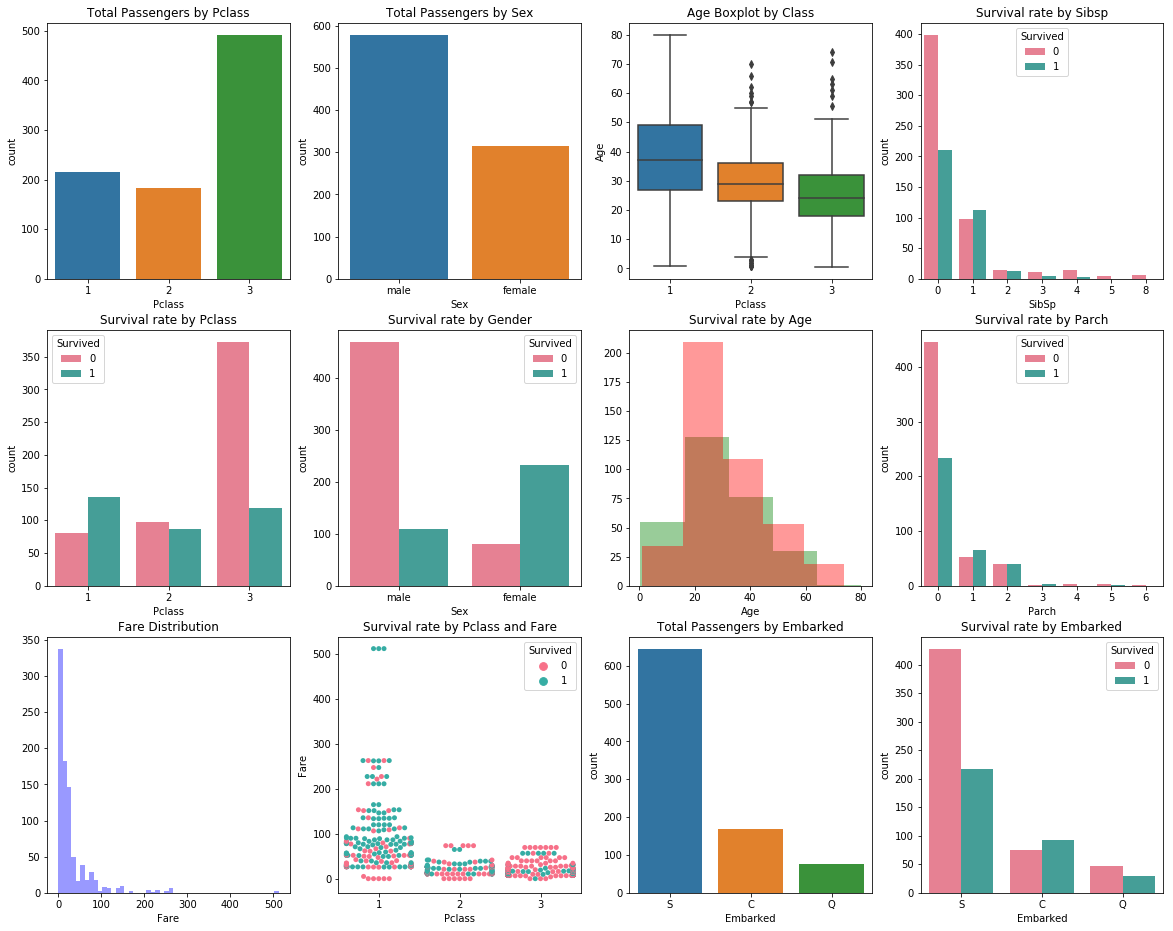

In [8]:
#First visual look into the dataset
f, ax = plt.subplots(3,4, figsize = (20, 16))
sns.countplot('Pclass', data = train, ax = ax[0,0])
sns.countplot('Sex', data = train, ax = ax[0,1])
sns.boxplot(x = 'Pclass', y = 'Age', data = train, ax = ax[0,2])
sns.countplot(x = 'SibSp', hue = 'Survived', data = train, ax = ax[0,3], palette = 'husl')
sns.countplot('Pclass', hue = 'Survived', data = train, ax = ax[1,0], palette = 'husl')
sns.countplot('Sex', hue = 'Survived', data = train, ax = ax[1,1], palette = 'husl')
sns.distplot(train[train['Survived'] == 1]['Age'].dropna(), kde = False, color = 'g', bins = 5, ax = ax[1,2])
sns.distplot(train[train['Survived'] == 0]['Age'].dropna(), kde = False, color = 'r', bins = 5, ax = ax[1,2])
sns.countplot('Parch', hue = 'Survived', data = train, ax = ax[1,3], palette = 'husl')
sns.distplot(train['Fare'].dropna(), ax = ax[2,0], kde = False,color = 'b')
sns.swarmplot(x = 'Pclass', y = 'Fare', hue = 'Survived', data = train, ax = ax[2,1], palette = 'husl')
sns.countplot('Embarked', data = train, ax = ax[2,2])
sns.countplot(x = 'Embarked', hue = 'Survived', data = train, ax = ax[2,3], palette = 'husl')

#set title
ax[0,0].set_title('Total Passengers by Pclass')
ax[0,1].set_title('Total Passengers by Sex')
ax[0,2].set_title('Age Boxplot by Class')
ax[0,3].set_title('Survival rate by Sibsp')
ax[1,0].set_title('Survival rate by Pclass')
ax[1,1].set_title('Survival rate by Gender')
ax[1,2].set_title('Survival rate by Age')
ax[1,3].set_title('Survival rate by Parch')
ax[2,0].set_title('Fare Distribution')
ax[2,1].set_title('Survival rate by Pclass and Fare')
ax[2,2].set_title('Total Passengers by Embarked')
ax[2,3].set_title('Survival rate by Embarked')

##  2. EDA, cleaning and Engineering features

#### 2.1 Correcting and completing features

Viewing the data there doesn't seem to be any evident abberant data. Lets consider the columns Age, Sibsp, Parch, Fare to see if there are any anamolies. 

In [9]:
#Outlier detection 
def detect_outliers(df,n,features):
    outlier_indices = []
    #iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.nanpercentile(df[col],25)
        # 3rd quartile (75%)
        Q3 = np.nanpercentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 1.5 * IQR
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index       
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    return multiple_outliers   
# detect outliers from Age, SibSp , Parch and Fare
Outliers_to_drop = detect_outliers(train,2,["Age","SibSp","Parch","Fare"])
train.loc[Outliers_to_drop] # Show the outliers rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.00,B22,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S


Observations from the outliers:
1. 10 outliers were found
2. Passengers 28, 89, 342 have high Fare
3. Rest of them have high SibSp values
3. Lets keep them for now.

**Later we can check what happens to the prediction if we remove them**

Completing features: Finding missing values

In [10]:
train.info()
print('-'*35)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
-----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null obje

Age, Cabin and Embarked have missing values. These have to be filled since some algorithms fail as they don't know how to handle the missing values. 

#### 2.2 Descriptive analysis - Univariate 

In [11]:
full_data = [train, test]
train['Survived'].describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

#### 2.3 Feature engineering - Bivariate analysis

One of the first tasks in Data Analytics is to convert the variables into numerical/ordinal values. There are multiple types of data

a) Qualitative data: discrete

Nominal: no natural order between categories. In this case: Name
Categorical: Sex

b) Numeric or quantitative data

Discrete: could be ordinal like Pclass or not like Survived.
Continuous. e.g.: age Many feature engineering steps were taken from Anisotropic's excellent kernel.

Pclass vs Survived

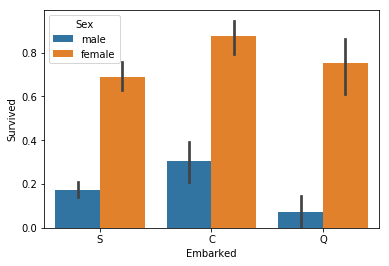

In [12]:
sns.barplot(x = 'Embarked', y = 'Survived', hue = 'Sex', data = train)

Embarked doesn't seem to have any effect on the survival rate

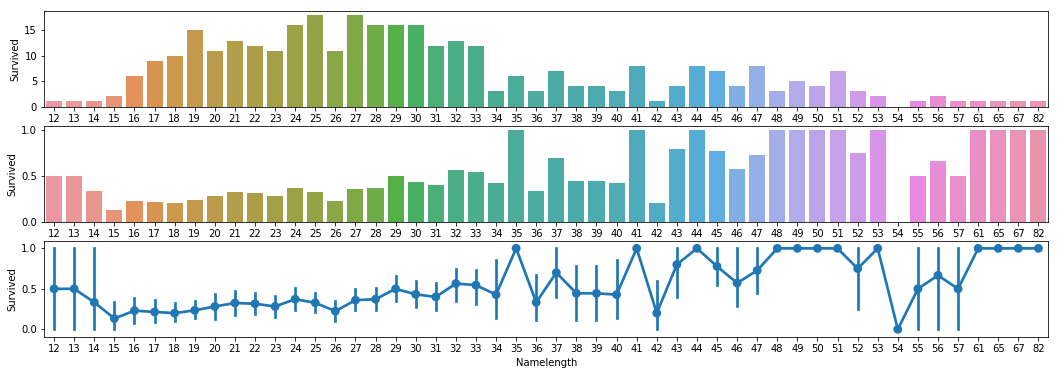

In [13]:
for dataset in full_data:
    dataset['Namelength'] = train['Name'].apply(len)
    
sum_name = train[['Namelength', 'Survived']].groupby('Namelength', as_index = False).sum()
avg_survival = train[['Namelength', 'Survived']].groupby('Namelength', as_index = False).mean()

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize = (18,6))
sns.barplot(x='Namelength', y='Survived', data=sum_name, ax = ax1)
sns.barplot(x='Namelength', y='Survived', data=avg_survival, ax = ax2)
sns.pointplot(x = 'Namelength', y = 'Survived', data=train, ax = ax3)

Fig 1: Total number of people survived by Namelength
Fig 2 : Survival rate by Namelength

Based on the survial rates there are 4 categories suggested: < 24, 24 to 28, 29 to 40, >41

In [14]:
for dataset in full_data:
    dataset.loc[ dataset['Namelength'] <= 23, 'Namelength']                                  = 0
    dataset.loc[(dataset['Namelength'] > 23) & (dataset['Namelength'] <= 28), 'Namelength']  = 1
    dataset.loc[(dataset['Namelength'] > 28) & (dataset['Namelength'] <= 40), 'Namelength']  = 2
    dataset.loc[ dataset['Namelength'] > 40, 'Namelength']                                   = 3
    
train['Namelength'].value_counts() 

0    360
1    240
2    201
3     90
Name: Namelength, dtype: int64

In [15]:
#mapping gender
for dataset in full_data:# Mapping Gender
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)    

Distribution of age of passengers who survived vs didn't survive

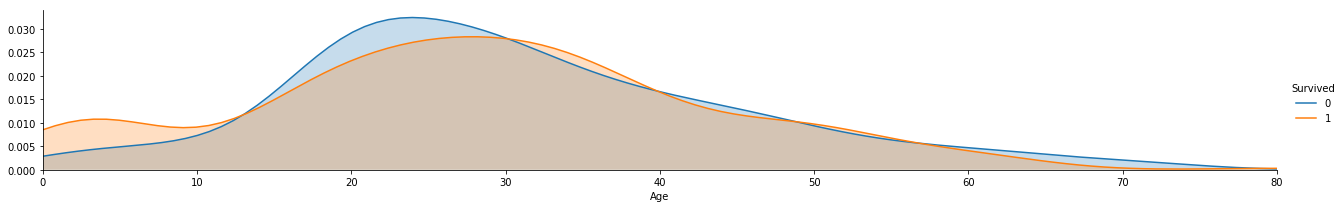

In [16]:
a = sns.FacetGrid(data = train, hue = 'Survived', aspect = 6)
a.map(sns.kdeplot, 'Age', shade = True)
a.set(xlim = (0, train['Age'].max()))
a.add_legend()

In [17]:
for dataset in full_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)

    dataset.loc[ dataset['Age'] <= 14, 'Age']          = 0
    dataset.loc[(dataset['Age'] > 14) & (dataset['Age'] <= 30), 'Age']        = 5
    dataset.loc[(dataset['Age'] > 30) & (dataset['Age'] <= 40), 'Age']        = 1
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 50), 'Age']        = 3
    dataset.loc[(dataset['Age'] > 50) & (dataset['Age'] <= 60), 'Age']        = 2
    dataset.loc[ dataset['Age'] > 60, 'Age']                                  = 4
    
train['Age'].value_counts()

/Users/kriti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


5    436
1    210
3    103
0     78
2     42
4     22
Name: Age, dtype: int64

In [18]:
train[['Age', 'Survived']].groupby(['Age'], as_index = False)['Survived'].mean().sort_values(by = 'Survived', ascending = False)


,Age,Survived
0,0,0.576923
1,1,0.419048
2,2,0.404762
3,3,0.388350
5,5,0.337156
4,4,0.227273


Create a new feature for family size with SibSp and Parch

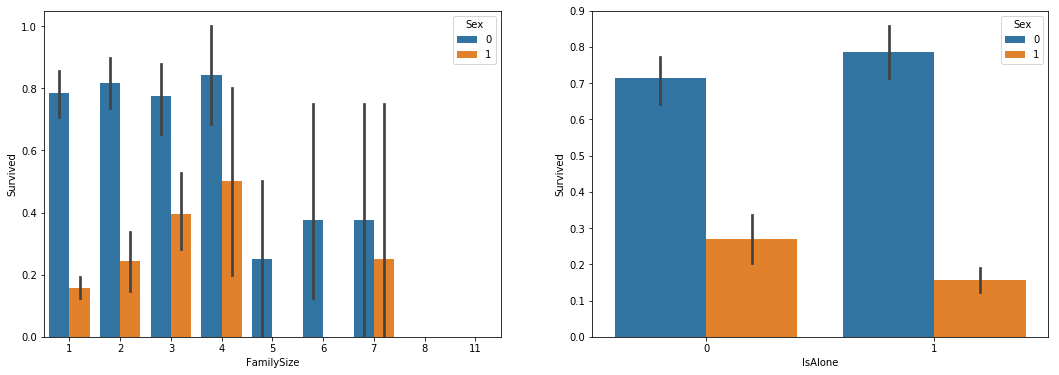

In [19]:
for dataset in full_data:
    #New feature family_size with total sibsp and parch
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    
    #new feature which is 1 when family_size is 1 otherwise 0
    dataset['IsAlone'] = 0
    dataset.loc[(dataset['FamilySize'] == 1), 'IsAlone'] = 1
    
    #New feature boys with family size
    dataset['Boys'] = 0
    dataset.loc[(dataset['Age'] == 0) & (dataset['Sex']==1), 'Boys'] = 1
    
fig, (axis1, axis2) = plt.subplots(1, 2, figsize= (18, 6))
sns.barplot(x="FamilySize", y="Survived", hue="Sex", data=train, ax = axis1);
sns.barplot(x="IsAlone", y="Survived", hue="Sex", data=train, ax = axis2);

IsAlone is not a good predictor of survival since the values go in different directions and doesn't have any significance. It can be removed

In [20]:
# Interactive chart using cufflinks
import cufflinks as cf
cf.go_offline()
train['Fare'].iplot(kind='hist', bins=30)

/Users/kriti/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



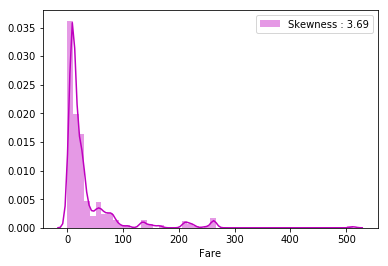

In [21]:
# Remove all NULLS in the Fare column and create a new feature Categorical Fare
for dataset in full_data:
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())

# Explore Fare distribution 
g = sns.distplot(dataset["Fare"], color="m", label="Skewness : %.2f"%(dataset["Fare"].skew()))
g = g.legend(loc="best")

Observations

The Fare distribution is very skewed to the left. This can lead to overweigthing the model with very high values.
In this case, it is better to transform it with the log function to reduce the skewness and redistribute the data.

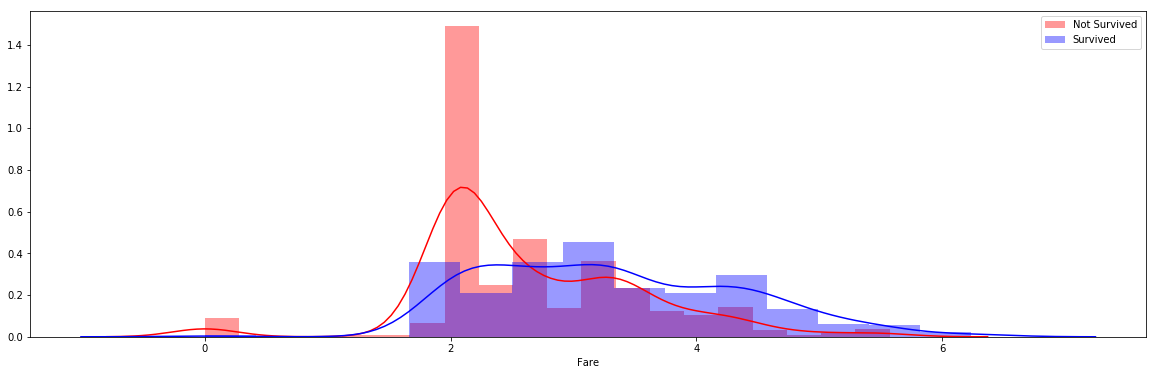

In [22]:
# Apply log to Fare to reduce skewness distribution
for dataset in full_data:
    dataset["Fare"] = dataset["Fare"].map(lambda i: np.log(i) if i > 0 else 0)
a4_dims = (20, 6)
fig, ax = plt.subplots(figsize=a4_dims)
g = sns.distplot(train["Fare"][train["Survived"] == 0], color="r", label="Skewness : %.2f"%(train["Fare"].skew()), ax=ax)
g = sns.distplot(train["Fare"][train["Survived"] == 1], color="b", label="Skewness : %.2f"%(train["Fare"].skew()))
#g = g.legend(loc="best")
g = g.legend(["Not Survived","Survived"])

In [23]:
for dataset in full_data:
    dataset.loc[ dataset['Fare'] <= 2.7, 'Fare']       = 0
    dataset.loc[ dataset['Fare'] > 2.7, 'Fare']   = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
train['Fare'].value_counts()

0    457
3    434
Name: Fare, dtype: int64

In [24]:
# Feature that tells whether a passenger had a cabin on the Titanic (O if no cabin number, 1 otherwise)
for dataset in full_data:
    dataset['Has_Cabin'] = dataset["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

train[["Has_Cabin", "Survived"]].groupby(['Has_Cabin'], as_index=False).sum().sort_values(by='Survived', ascending=False)

,Has_Cabin,Survived
0,0,206
1,1,136


In [25]:
train[["Has_Cabin", "Survived"]].groupby(['Has_Cabin'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Has_Cabin,Survived
1,1,0.666667
0,0,0.299854


Embarked

In [26]:
for dataset in full_data:
# Remove all NULLS in the Embarked column
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
# Mapping Embarked
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    
train_pivot = pd.pivot_table(train, values= 'Survived',index=['Embarked'],columns='Pclass',aggfunc=np.mean, margins=True)
def color_negative_red(val):
    # Takes a scalar and returns a string with the css property 'color: red' if below 0.4, black otherwise.
    color = 'red' if val < 0.4 else 'black'
    return 'color: %s' % color
train_pivot = train_pivot.style.applymap(color_negative_red)
train_pivot

Pclass,1,2,3,All
Embarked,,,,
0,0.589147,0.463415,0.189802,0.339009
1,0.694118,0.529412,0.378788,0.553571
2,0.5,0.666667,0.375,0.38961
All,0.62963,0.472826,0.242363,0.383838


Irrespective of the class, passengers embarked in 0 (S) and 2 (Q) have lower chance of survival. I will combine those into the first category.

In [27]:
dataset['Embarked'] = dataset['Embarked'].replace(['0', '2'], '0')
train['Fare'].value_counts()

0    457
3    434
Name: Fare, dtype: int64

Titles

In [28]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Namelength,FamilySize,IsAlone,Boys,Has_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",1,5,1,0,A/5 21171,0,NaN,0,0,2,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,1,0,PC 17599,3,C85,1,3,2,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",0,5,0,0,STON/O2. 3101282,0,NaN,0,0,1,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,1,0,113803,3,C123,0,3,2,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,1,0,0,373450,0,NaN,0,1,1,1,0,0


/Users/kriti/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



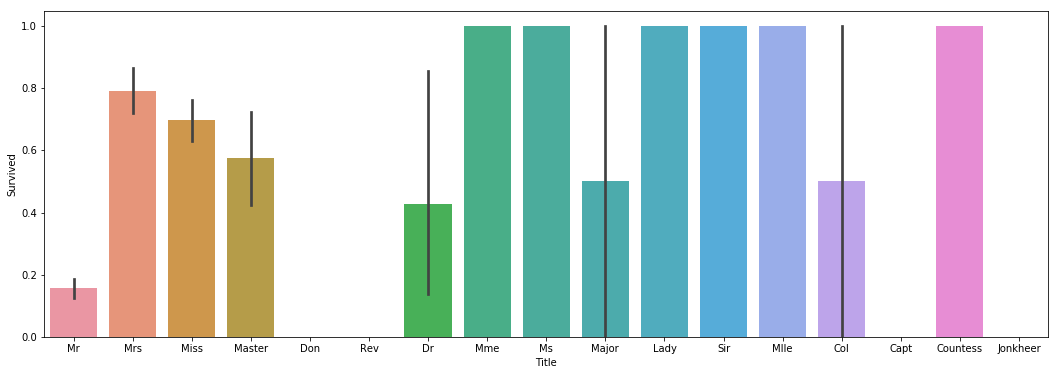

In [30]:
# Define function to extract titles from passenger names
import re
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
 # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""
for dataset in full_data:
# Create a new feature Title, containing the titles of passenger names
    dataset['Title'] = dataset['Name'].apply(get_title)

fig, (axis1) = plt.subplots(1,figsize=(18,6))
sns.barplot(x="Title", y="Survived", data=train, ax=axis1);

There are 4 types of titles:

Mme, Ms, Lady, Sir, Mlle, Countess: 100%.
Mrs, Miss: around 70% survival
Master: around 60%
Don, Rev, Capt, Jonkheer: no data
Dr, Major, Col: around 40%
Mr: below 20%

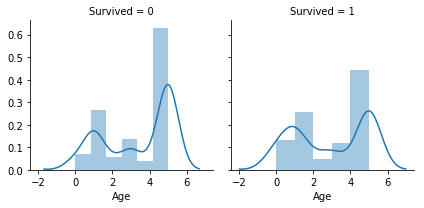

In [31]:
for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(['Mrs', 'Miss'], 'MM')
    dataset['Title'] = dataset['Title'].replace(['Dr', 'Major', 'Col'], 'DMC')
    dataset['Title'] = dataset['Title'].replace(['Don', 'Rev', 'Capt', 'Jonkheer'],'DRCJ')
    dataset['Title'] = dataset['Title'].replace(['Mme', 'Ms', 'Lady', 'Sir', 'Mlle', 'Countess'],'MMLSMC' )
# Mapping titles
    title_mapping = {"MM": 1, "Master":2, "Mr": 5, "DMC": 4, "DRCJ": 3, "MMLSMC": 0}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(3)
    
# Explore Age vs Survived
g = sns.FacetGrid(train, col='Survived')
g = g.map(sns.distplot, "Age")

In [32]:
train[["Title", "Survived"]].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Title,Survived
0,0,1.000000
1,1,0.736156
2,2,0.575000
4,4,0.454545
5,5,0.156673
3,3,0.000000


#### Extracting deck from cabin
A cabin number looks like ‘C123’ and the letter refers to the deck: a big thanks to Nikas Donge. Therefore we’re going to extract these and create a new feature, that contains a persons deck. Afterwords we will convert the feature into a numeric variable. The missing values will be converted to zero.

In [33]:
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
for dataset in full_data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int) 
train['Deck'].value_counts()

8    687
3     59
2     47
4     33
5     32
1     15
6     13
7      4
0      1
Name: Deck, dtype: int64

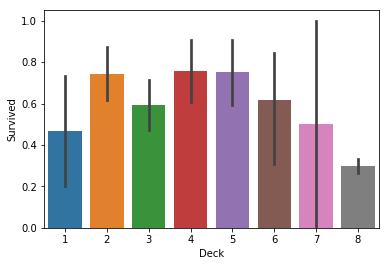

In [34]:
sns.barplot(x = 'Deck', y = 'Survived', order=[1,2,3,4,5,6,7,8], data=train)

3 types of deck: 1 with 15 passengers, 2 to 6, and 7 to 8 (most passengers)

In [35]:
for dataset in full_data:
    dataset.loc[ dataset['Deck'] <= 1, 'Deck'] = 1
    dataset.loc[(dataset['Deck'] > 1) & (dataset['Deck'] <= 6), 'Deck']  = 3
    dataset.loc[ dataset['Deck'] > 6, 'Deck'] = 0
train[["Deck", "Survived"]].groupby(['Deck'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Deck,Survived
2,3,0.690217
1,1,0.437500
0,0,0.301013


#### 2.4 Visualizing updated dataset

In [36]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Namelength,FamilySize,IsAlone,Boys,Has_Cabin,Title,Deck
0,892,3,"Kelly, Mr. James",1,1,0,0,330911,0,U0,2,0,1,1,0,0,5.0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,3,1,0,363272,0,U0,0,3,2,0,0,0,1.0,0
2,894,2,"Myles, Mr. Thomas Francis",1,4,0,0,240276,0,U0,2,0,1,1,0,0,5.0,0
3,895,3,"Wirz, Mr. Albert",1,5,0,0,315154,0,U0,0,3,1,1,0,0,5.0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,5,1,1,3101298,0,U0,0,1,3,0,0,0,1.0,0


In [37]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Namelength,FamilySize,IsAlone,Boys,Has_Cabin,Title,Deck
0,1,0,3,"Braund, Mr. Owen Harris",1,5,1,0,A/5 21171,0,U0,0,0,2,0,0,0,5,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,1,0,PC 17599,3,C85,1,3,2,0,0,1,1,3
2,3,1,3,"Heikkinen, Miss. Laina",0,5,0,0,STON/O2. 3101282,0,U0,0,0,1,1,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,1,0,113803,3,C123,0,3,2,0,0,1,1,3
4,5,0,3,"Allen, Mr. William Henry",1,1,0,0,373450,0,U0,0,1,1,1,0,0,5,0


#### 2.5. Descriptive Statistics

In [38]:
train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Namelength,FamilySize,IsAlone,Boys,Has_Cabin,Title,Deck
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,3.222222,0.523008,0.381594,1.461279,0.361392,1.023569,1.904602,0.602694,0.043771,0.228956,3.415264,0.637486
std,257.353842,0.486592,0.836071,0.477990,1.927332,1.102743,0.806057,1.500342,0.635673,1.016993,1.613459,0.489615,0.204700,0.420397,1.912805,1.213180
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,446.000000,0.000000,3.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,5.000000,0.000000
75%,668.500000,1.000000,3.000000,1.000000,5.000000,1.000000,0.000000,3.000000,1.000000,2.000000,2.000000,1.000000,0.000000,0.000000,5.000000,0.000000
max,891.000000,1.000000,3.000000,1.000000,5.000000,8.000000,6.000000,3.000000,2.000000,3.000000,11.000000,1.000000,1.000000,1.000000,5.000000,3.000000


In [39]:
train[['Pclass', 'Sex', 'Age', 'Parch', 'Fare', 'Embarked', 'Has_Cabin', 'FamilySize', 'Title', 'Survived']].groupby(['Survived'], as_index=False).mean().sort_values(by='Pclass', ascending=False)


,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,Has_Cabin,FamilySize,Title
0,0,2.531876,0.852459,3.413479,0.329690,1.125683,0.307832,0.123862,1.883424,4.273224
1,1,1.950292,0.318713,2.915205,0.464912,2.000000,0.447368,0.397661,1.938596,2.038012


Initial observations from the descriptive statistics:

* Only 38% survived
* Passengers in more expensive classes 1 and 2 had much higher chance of surviving than classes 3 or 4.
* Also, the higher the fare, the higher the chance. Similarly, having a cabin increases the chance of survival.
* Women (0) higher chance than men (1)
* Younger people slightly more chance than older
* Being alone decreased your chance to survive.

#### Correlation analysis - Multivariate analysis